In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("rainfall in india 1901-2015.csv")
df.head()


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [12]:
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

<Axes: >

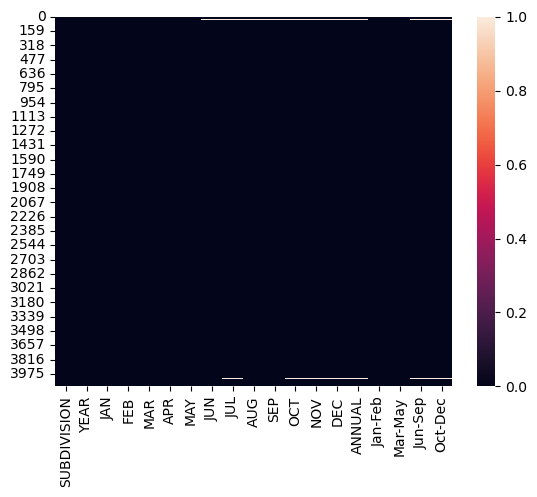

In [16]:
sb.heatmap(df.isnull())

In [18]:
df.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [20]:
df.duplicated().sum()

0

In [22]:
df=df.drop_duplicates()

In [24]:
# Drop rows with any null values
df = df.dropna()

# Drop columns with any null values
df = df.dropna(axis=1)

# Drop rows where all columns are NaN
df = df.dropna(how='all')

# Drop rows with at least 2 NaN values
df = df.dropna(thresh=2)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4090 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4090 non-null   object 
 1   YEAR         4090 non-null   int64  
 2   JAN          4090 non-null   float64
 3   FEB          4090 non-null   float64
 4   MAR          4090 non-null   float64
 5   APR          4090 non-null   float64
 6   MAY          4090 non-null   float64
 7   JUN          4090 non-null   float64
 8   JUL          4090 non-null   float64
 9   AUG          4090 non-null   float64
 10  SEP          4090 non-null   float64
 11  OCT          4090 non-null   float64
 12  NOV          4090 non-null   float64
 13  DEC          4090 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4090 non-null   float64
 16  Mar-May      4090 non-null   float64
 17  Jun-Sep      4090 non-null   float64
 18  Oct-Dec      4090 non-null   float64
dtypes: float64(

In [28]:
df.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

In [32]:
obj = LabelEncoder()

In [34]:
SUBDIVISION=obj.fit_transform(df["SUBDIVISION"])

In [36]:
SUBDIVISION

array([ 0,  0,  0, ..., 18, 18, 18])

<Axes: >

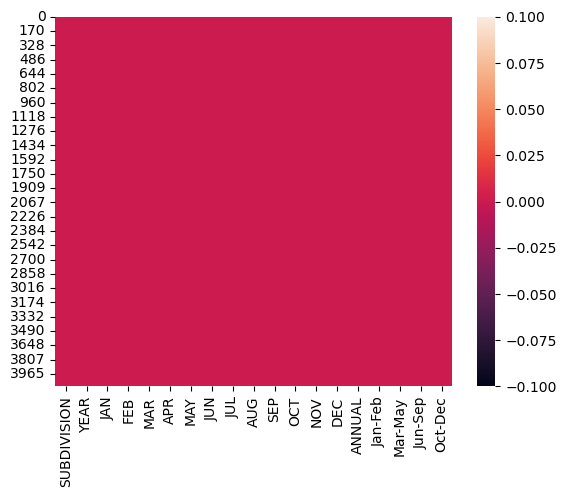

In [38]:
sb.heatmap(df.isnull())

In [40]:
df["SUBDIVISION"]=SUBDIVISION

In [42]:
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,0,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,0,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,0,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,0,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,18,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,18,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,18,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,18,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


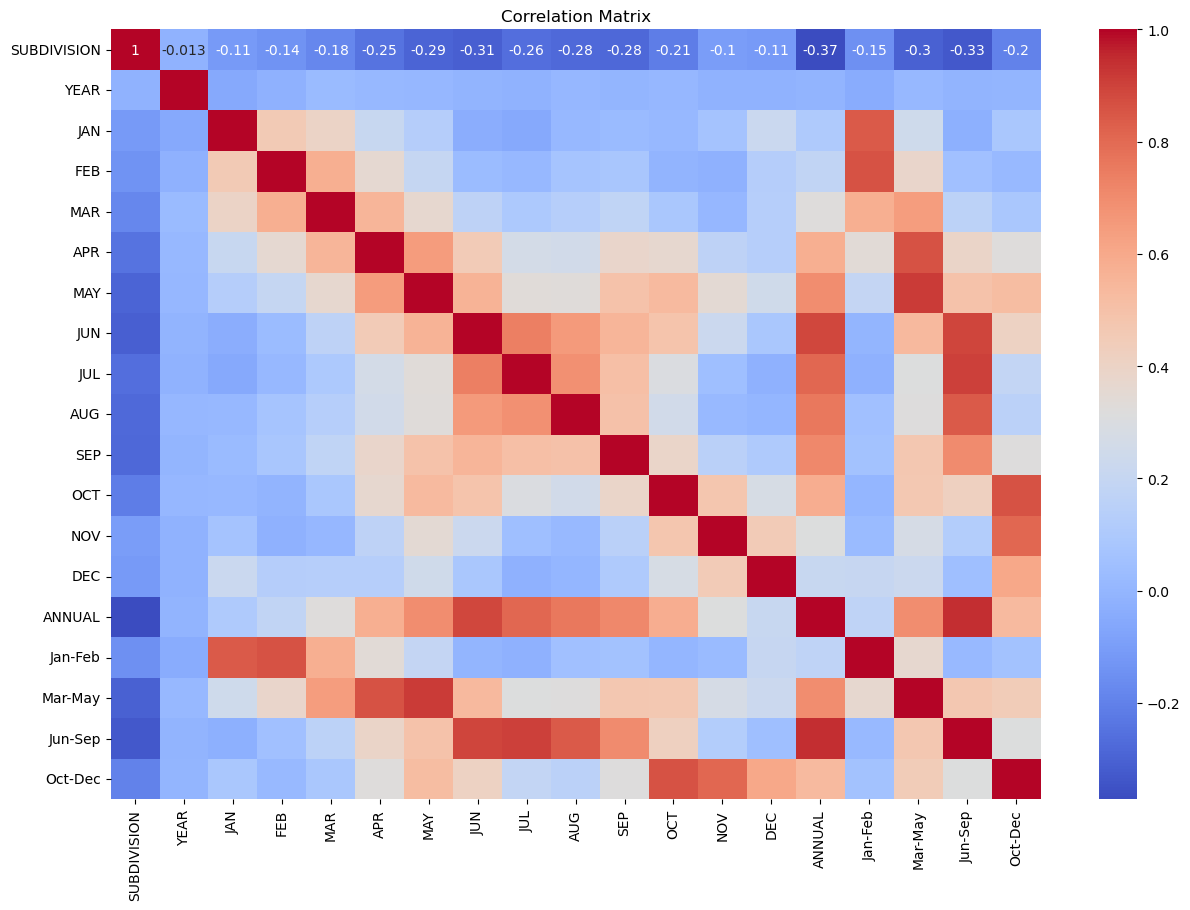

In [91]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
# Separate features and target variable
X = df.drop(columns=['ANNUAL','JAN','FEB','MAR','APR','MAY','JUN','AUG','SEP','OCT','NOV','DEC'])
y = df['ANNUAL']


In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_train is continuous values
# Convert to categorical labels
label_encoder = LabelEncoder()
y_train_categorical = label_encoder.fit_transform(y_train)

# Now y_train_categorical should be suitable for classification with DecisionTreeClassifier


In [58]:
from sklearn.tree import DecisionTreeRegressor

# Define and fit the regressor model
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train, y_train)

# Proceed with evaluation and predictions for regression tasks


DecisionTreeRegressor(random_state=0)

In [60]:
y_dt_pred = dt_regressor.predict(X_test)
y_dt_pred

array([1261.4, 1334.3,  498.3,  897.9, 2610.5, 1131.6, 1598.5, 2798.4,
       3020.7,  913.8, 2836.3, 1132.3, 3020.7,  290. ,  906.9, 1961.3,
        635.8, 2923.1,  310.2, 1539. , 1259.4,  953.7, 2638.2, 3080.9,
        384.9, 1370.4, 3480.9, 1599.9,  717.9, 1575.4, 1583. ,  912.6,
       1117. , 1064.1,  890.5, 1163.1, 2651.4,  728.5,  863.8,  561.3,
       3699.2, 2726.7,  827.7,  916.7, 2355.9, 2807.4, 2923.1,  553.8,
        626.6, 1607.3, 1065.8, 3313.7, 4155.3, 1222.4, 2682.1, 3027.2,
       1294.1,  967.6,  672.7, 1898.6,  945. ,  401.3, 2262.1,  986.1,
        732.4,  185.9,  947.2, 1608.1,  509.4, 1016.3, 1243.2,  445.2,
       2886.6, 2261.9, 1001.2,  738.6,  997.7,  980.6, 1087.4, 3027.2,
       1174.7,  552. , 2466.9, 1041.4, 2193.7,  992. , 1263.7, 2511.7,
        143. , 1047. , 1192.8, 2544.7,  815.1,  525.1,  598.2, 1052.7,
        511. ,  305.5, 1430.6,  690.5, 3942.2, 2544.9,  875.2, 1968.6,
       1324.9,  666.9,  676.2,  859.3, 1271.5,  272. , 2422.2,  554.3,
      

In [62]:
from sklearn.metrics import classification_report

In [64]:
#Model accuracy
from sklearn.metrics import r2_score



In [66]:
model=[DecisionTreeRegressor]

In [68]:
r2_score(y_test,y_dt_pred)*100

98.31038780447919

In [71]:
from sklearn.model_selection import cross_val_score, cross_validate

In [73]:
y_dt_pred = dt_regressor.predict(X_test)
print("Predicted rainfall values:")
print(y_dt_pred)


Predicted rainfall values:
[1261.4 1334.3  498.3  897.9 2610.5 1131.6 1598.5 2798.4 3020.7  913.8
 2836.3 1132.3 3020.7  290.   906.9 1961.3  635.8 2923.1  310.2 1539.
 1259.4  953.7 2638.2 3080.9  384.9 1370.4 3480.9 1599.9  717.9 1575.4
 1583.   912.6 1117.  1064.1  890.5 1163.1 2651.4  728.5  863.8  561.3
 3699.2 2726.7  827.7  916.7 2355.9 2807.4 2923.1  553.8  626.6 1607.3
 1065.8 3313.7 4155.3 1222.4 2682.1 3027.2 1294.1  967.6  672.7 1898.6
  945.   401.3 2262.1  986.1  732.4  185.9  947.2 1608.1  509.4 1016.3
 1243.2  445.2 2886.6 2261.9 1001.2  738.6  997.7  980.6 1087.4 3027.2
 1174.7  552.  2466.9 1041.4 2193.7  992.  1263.7 2511.7  143.  1047.
 1192.8 2544.7  815.1  525.1  598.2 1052.7  511.   305.5 1430.6  690.5
 3942.2 2544.9  875.2 1968.6 1324.9  666.9  676.2  859.3 1271.5  272.
 2422.2  554.3 1171.6 2580.1 1254.4 1354.3 1035.6 1632.4  615.3 2996.9
  690.4  977.8  667.   769.3 1909.  2304.2  443.9 2996.9  400.3  238.4
  767.6  445.2 1383.1  272.  3403.   822.6 2984.5 134

In [75]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_dt_pred})
print(results)


      Actual  Predicted
611   1245.5     1261.4
764   1357.1     1334.3
2031   440.0      498.3
1013   905.2      897.9
2531  2305.1     2610.5
...      ...        ...
1433   740.1      737.5
73    1849.4     2764.0
2209  1430.4     1421.0
3214   554.7      437.0
233   2793.1     2651.4

[818 rows x 2 columns]


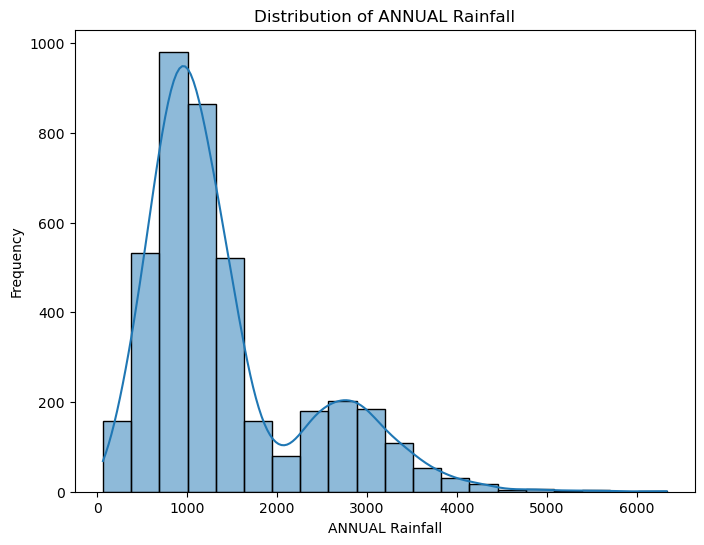

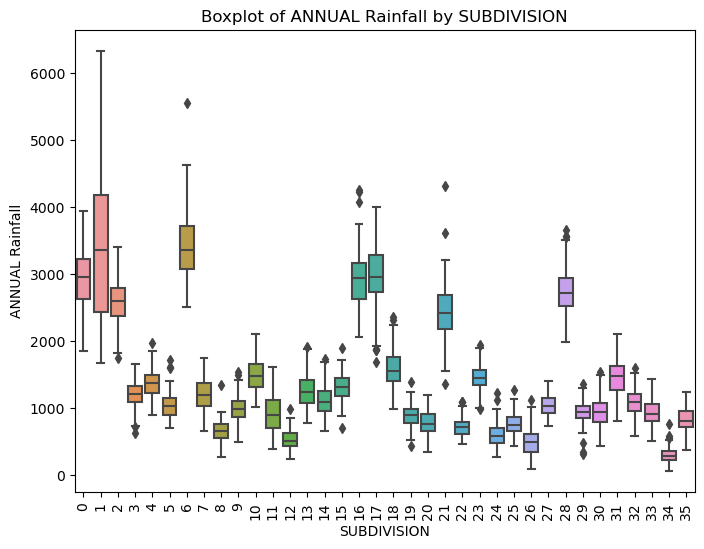

In [77]:


# Example histogram
plt.figure(figsize=(8, 6))
sb.histplot(df['ANNUAL'], bins=20, kde=True)
plt.title('Distribution of ANNUAL Rainfall')
plt.xlabel('ANNUAL Rainfall')
plt.ylabel('Frequency')
plt.show()

# Example boxplot
plt.figure(figsize=(8, 6))
sb.boxplot(x=df['SUBDIVISION'], y=df['ANNUAL'])
plt.title('Boxplot of ANNUAL Rainfall by SUBDIVISION')
plt.xlabel('SUBDIVISION')
plt.ylabel('ANNUAL Rainfall')
plt.xticks(rotation=90)
plt.show()


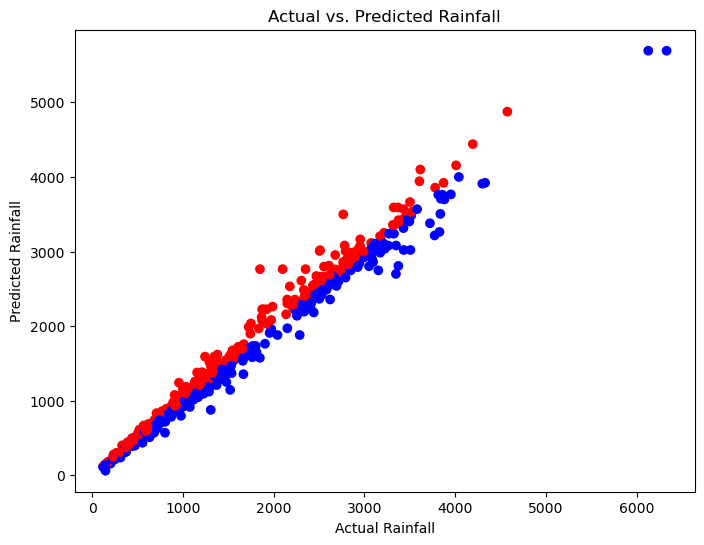

In [89]:
# Example scatter plot of actual vs. predicted values


# Example: Color points based on prediction accuracy
colors = np.where(y_dt_pred >= y_test, 'red', 'blue')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_dt_pred, c=colors)  # Use the colors array
plt.title('Actual vs. Predicted Rainfall')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.show()




R-squared: 98.31038780447919


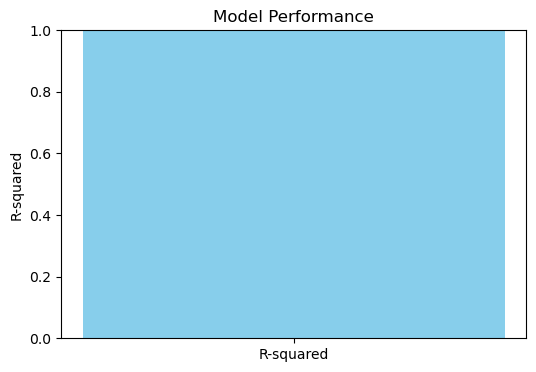

In [114]:
# Print or display R-squared score
print(f"R-squared: {r2}")

# Example bar plot of R-squared score
plt.figure(figsize=(6, 4))
plt.bar(['R-squared'], [r2], color='skyblue')
plt.title('Model Performance')
plt.ylabel('R-squared')
plt.ylim(0, 1)  # Adjust ylim based on your score range
plt.show()
